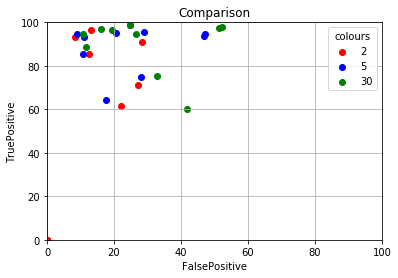

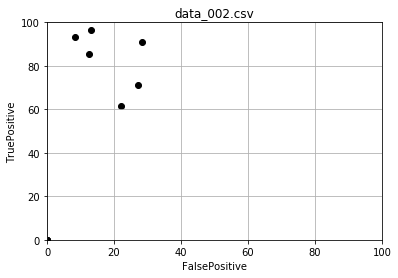

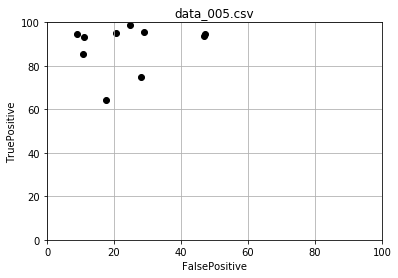

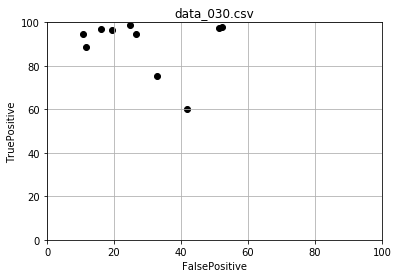

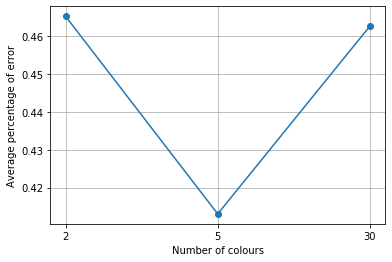

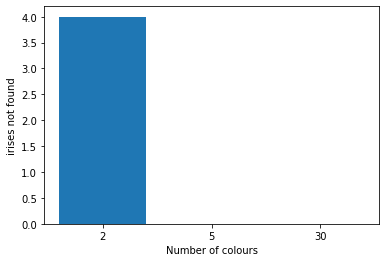

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import csv


csvFolder = glob.glob("CSVFILES/" + "*.csv")
csvFolder.sort()

# Colours used for comparison scatter plot
colourList = ['red','blue','green','orange']
colourAmount = []
y_means = []
no_iris = []
file_count = 0

# set up comparison plot
fig, comparisonplot = plt.subplots()
comparisonplot.set_title("Comparison")
comparisonplot.set_xlim(0, 100)
comparisonplot.set_ylim(0, 100)
comparisonplot.set_xlabel('FalsePositive')
comparisonplot.set_ylabel('TruePositive')
comparisonplot.grid(True)


for csvfile in csvFolder:
    # Find amount of colours from the file name
    csvfilename = csvfile.replace("CSVFILES/","")
    colours = csvfile.split("_")
    colours = colours[1].replace(".csv","")
    colours = colours.lstrip('0')
    colourAmount.append(colours)
    
    file_count += 1
    y_accum = 0
    row_count = 0
    found = 0
    notFound = 0
    FP = []
    TP = []
    
    fig, batchplot = plt.subplots()
    with open(csvfile, 'r') as _filehandler:
        csv_file_reader = csv.DictReader(_filehandler)
        
        # Go through results for each eye
        for row in csv_file_reader:
            row_count += 1

            if row['noCircles'] == 'True':
                notFound += 1
            else:
                # Calculate y value for an image 
                y = (float(row['FP'])+float(row['FN']))/(float(row['TP'])+1)
                y_accum += y
                found += 1
            
            # Plot values for image in a CSV file
            batchplot.scatter(float(row['FP']), float(row['TP']), color='black')
            
            #comparisonplot.scatter(float(row['FP']), float(row['TP']), color=colourList[file_count-1])
            FP.append(float(row['FP']))
            TP.append(float(row['TP']))

        
        # Display scatter plot for one CSV file
        batchplot.set_title(csvfilename)
        batchplot.set_xlim(0, 100)
        batchplot.set_ylim(0, 100)
        batchplot.set_xlabel('FalsePositive')
        batchplot.set_ylabel('TruePositive')
        batchplot.grid(True)
        #plt.show()
        # fig.savefig("2DScatterplot.pdf", bbox_inches='tight')
        
        comparisonplot.scatter(FP, TP, label=colours, color=colourList[file_count-1])
            
    y_means.append(y_accum/found)
    no_iris.append(notFound)
        

comparisonplot.legend(title='colours')

# Make average error plot
fig, error = plt.subplots() 
error.plot(colourAmount, y_means, 'o-')
error.grid(True)
#error.set_xlim(0, 30)
#error.set_ylim(0, 100)
error.set_xlabel('Number of colours')
error.set_ylabel('Average percentage of error')

# Make bar chart for irises not found
fig, ax = plt.subplots()
ax.bar(colourAmount,no_iris,align='center')
plt.xticks(colourAmount)
ax.set_xlabel('Number of colours')
ax.set_ylabel('irises not found')

plt.show()
#fig.savefig("plot.pdf", bbox_inches='tight')
